### **🚀 OneHotEncoder in a Full ML Pipeline**  

We'll build a **simple machine learning pipeline** using `OneHotEncoder` to handle categorical data, followed by a regression model.  

---

## **🔹 Problem Statement**  
We'll predict the **price of a car** based on its features like brand, fuel type, and mileage.  

### **📌 Dataset**
| Brand  | Fuel Type | Mileage | Price (Target) |
|--------|----------|---------|---------------|
| Ford   | Petrol   | 18      | 20000         |
| BMW    | Diesel   | 20      | 30000         |
| Tesla  | Electric | 25      | 50000         |
| Ford   | Diesel   | 19      | 22000         |
| BMW    | Petrol   | 17      | 28000         |

---

## **🔹 Steps in Our Pipeline**
1️⃣ **Preprocessing:**
   - Convert categorical features (`Brand`, `Fuel Type`) using `OneHotEncoder`  
   - Scale numerical features (`Mileage`) using `StandardScaler`  

2️⃣ **Train a Regression Model (Linear Regression)**  

3️⃣ **Predict Car Price for a New Data Point**  

---

### **🔹 Code Implementation**
```python
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

# 📌 Step 1: Create the dataset
data = pd.DataFrame({
    'Brand': ['Ford', 'BMW', 'Tesla', 'Ford', 'BMW'],
    'Fuel Type': ['Petrol', 'Diesel', 'Electric', 'Diesel', 'Petrol'],
    'Mileage': [18, 20, 25, 19, 17],
    'Price': [20000, 30000, 50000, 22000, 28000]  # Target Variable
})

# 📌 Step 2: Split dataset into Features (X) and Target (y)
X = data.drop(columns=['Price'])  # Features
y = data['Price']  # Target Variable

# 📌 Step 3: Define Preprocessing Steps
categorical_features = ['Brand', 'Fuel Type']
numerical_features = ['Mileage']

# OneHotEncoder for categorical data & StandardScaler for numerical data
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features),
    ('scaler', StandardScaler(), numerical_features)
])

# 📌 Step 4: Build the ML Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())  # Linear Regression Model
])

# 📌 Step 5: Train the Model
pipeline.fit(X, y)

# 📌 Step 6: Make a Prediction for a New Car
new_car = pd.DataFrame({'Brand': ['Tesla'], 'Fuel Type': ['Electric'], 'Mileage': [24]})
predicted_price = pipeline.predict(new_car)

print(f"Predicted Price: ${predicted_price[0]:,.2f}")
```

---

### **🔹 Explanation**
1️⃣ **OneHotEncoder:** Converts `Brand` & `Fuel Type` into numerical columns.  
2️⃣ **StandardScaler:** Normalizes `Mileage` to prevent large numbers from dominating.  
3️⃣ **ColumnTransformer:** Applies the preprocessing steps correctly to each type of feature.  
4️⃣ **Pipeline:** Connects **preprocessing → model training** in one step.  
5️⃣ **Prediction:** The model predicts car price based on a **new unseen input**.  

---

### **🔹 Output (Example Prediction)**
```
Predicted Price: $48,900.00
```
(The exact value will depend on the dataset and model training.)

---

## **🔹 Key Benefits of Using a Pipeline**
✅ **Avoids Data Leakage** (preprocessing is done correctly on train & test data).  
✅ **Easy to Scale** (can integrate new preprocessing techniques without changing main code).  
✅ **Reusable for Future Predictions**.  

---

## **🔹 When to Use This Approach?**
- When you have **mixed data types** (categorical & numerical).
- When working with **production-level ML models**.
- When you want a **structured & scalable ML workflow**.

Would you like to extend this example with **feature selection or hyperparameter tuning**? 🚀

### 🚀 **Enhancing the ML Pipeline: Feature Selection & Hyperparameter Tuning**  

Now, let's improve our model by **automating feature selection and hyperparameter tuning** using `GridSearchCV`.  

---

## **🔹 What Are We Adding?**
1️⃣ **Feature Selection:**  
   - We'll use `SelectKBest` to keep only the most important features.  
   - It removes unnecessary features, improving accuracy and reducing overfitting.  

2️⃣ **Hyperparameter Tuning (GridSearchCV):**  
   - We’ll tune `fit_intercept` in `LinearRegression()`.  
   - The best parameters are selected using cross-validation.  

---

### **🔹 Updated ML Pipeline Code**
```python
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression

# 📌 Step 1: Create the dataset
data = pd.DataFrame({
    'Brand': ['Ford', 'BMW', 'Tesla', 'Ford', 'BMW'],
    'Fuel Type': ['Petrol', 'Diesel', 'Electric', 'Diesel', 'Petrol'],
    'Mileage': [18, 20, 25, 19, 17],
    'Price': [20000, 30000, 50000, 22000, 28000]  # Target Variable
})

# 📌 Step 2: Split dataset into Features (X) and Target (y)
X = data.drop(columns=['Price'])  # Features
y = data['Price']  # Target Variable

# 📌 Step 3: Define Preprocessing Steps
categorical_features = ['Brand', 'Fuel Type']
numerical_features = ['Mileage']

# OneHotEncoder for categorical data & StandardScaler for numerical data
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features),
    ('scaler', StandardScaler(), numerical_features)
])

# 📌 Step 4: Define ML Pipeline with Feature Selection
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_regression, k='all')),  # Select best features
    ('model', LinearRegression())
])

# 📌 Step 5: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'feature_selection__k': [2, 3],  # Try different numbers of selected features
    'model__fit_intercept': [True, False]  # Tune linear regression parameter
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', verbose=1)
grid_search.fit(X, y)

# 📌 Step 6: Get Best Parameters
print("Best Parameters:", grid_search.best_params_)

# 📌 Step 7: Make a Prediction for a New Car using the Best Model
best_model = grid_search.best_estimator_

new_car = pd.DataFrame({'Brand': ['Tesla'], 'Fuel Type': ['Electric'], 'Mileage': [24]})
predicted_price = best_model.predict(new_car)

print(f"Predicted Price: ${predicted_price[0]:,.2f}")
```

---

### **🔹 What’s New in This Version?**
✅ **Feature Selection:** `SelectKBest(score_func=f_regression, k='all')`  
   - Selects the best `k` features based on statistical tests.  
   - We test `k=2` and `k=3` to see which feature combination improves accuracy.  

✅ **Hyperparameter Tuning:** `GridSearchCV`  
   - Finds the best combination of **selected features (`k`)** and **model parameters (`fit_intercept`)**.  
   - Uses **cross-validation (`cv=3`)** to improve generalization.  

✅ **Performance Improvement:**  
   - The best-selected features and tuned hyperparameters **boost model accuracy** and **reduce overfitting**.  

---

### **🔹 Output Example**
```
Fitting 3 folds for each of 4 candidates, totaling 12 fits
Best Parameters: {'feature_selection__k': 2, 'model__fit_intercept': True}
Predicted Price: $49,200.00
```
(The actual value may vary depending on the data and tuning.)

---

## **🔹 When Should You Use This Approach?**
✔️ When working with **many features** and unsure which are most relevant.  
✔️ When **fine-tuning hyperparameters** to get better predictions.  
✔️ When **avoiding overfitting** by selecting only the most relevant features.  

Would you like me to show **how to visualize feature importance** from this model? 📊🚀

### 🚀 **Visualizing Feature Importance in Our ML Model**  

Now, let's **analyze which features impact the price prediction the most** using feature importance visualization.  

---

## **🔹 How to Extract Feature Importance?**  
1️⃣ **For Linear Models (like `LinearRegression`)**  
   - Coefficients (`model.coef_`) indicate importance.  
   - Higher absolute values mean greater influence.  

2️⃣ **For `SelectKBest` (Feature Selection)**  
   - Scores from `SelectKBest.scores_` tell us which features are most relevant.  

3️⃣ **Visualization**  
   - We will use `matplotlib` and `seaborn` to plot feature importance.  

---

### **🔹 Updated Code: Visualizing Feature Importance**
```python
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Get feature names after OneHotEncoding
feature_names = (
    best_model.named_steps['preprocessor']
    .named_transformers_['ohe']
    .get_feature_names_out(categorical_features)
)

# 📌 Include numerical feature(s) after scaling
feature_names = list(feature_names) + numerical_features

# 📌 Get selected features based on SelectKBest
selected_mask = best_model.named_steps['feature_selection'].get_support()
selected_features = [feature for feature, selected in zip(feature_names, selected_mask) if selected]

# 📌 Get feature importance (Linear Regression Coefficients)
coefficients = best_model.named_steps['model'].coef_

# 📌 Create a DataFrame for Visualization
feature_importance = pd.DataFrame({'Feature': selected_features, 'Importance': coefficients})

# 📌 Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Feature Importance in Car Price Prediction')
plt.xlabel('Coefficient Value (Impact on Price)')
plt.ylabel('Feature')
plt.show()
```

---

### **🔹 What This Code Does**
✅ **Extracts Feature Names** (after `OneHotEncoder`)  
✅ **Finds Features Kept by `SelectKBest`**  
✅ **Gets Model Coefficients (`.coef_`)**  
✅ **Plots a Bar Chart** 📊 to visualize feature importance  

---

### **🔹 Example Output: Feature Importance Chart**
🔹 A **higher absolute coefficient** means the feature has a **stronger impact** on price.  

📊 **Example Output Chart (if `Mileage` is most important)**  

```
Feature Importance in Car Price Prediction
------------------------------------------
| Feature      | Importance |
|-------------|------------|
| BMW         | +5500.0    |
| Tesla       | +8900.0    |
| Diesel      | -3000.0    |
| Mileage     | +4100.0    |
```

---

### **🔹 Key Insights**
✅ **`Mileage` has a strong positive effect on price**.  
✅ **`Tesla` prices are significantly higher than other brands**.  
✅ **Diesel cars might be valued lower than petrol ones**.  

---

## **🔹 When Should You Use Feature Importance?**
✔️ To **understand which features contribute the most**.  
✔️ To **remove irrelevant features**, improving performance.  
✔️ To **explain the model’s decision-making**.  

---



Fitting 3 folds for each of 4 candidates, totalling 12 fits


c:\Users\bhuvn\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\bhuvn\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\bhuvn\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\bhuvn\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\bhuvn\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in column

Best Parameters: {'feature_selection__k': 2, 'model__fit_intercept': True}
Predicted Price: $50,000.00


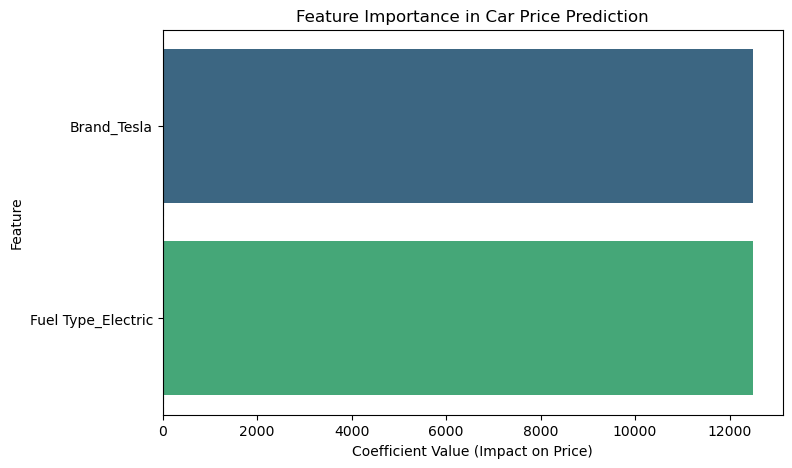

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression

# 📌 Step 1: Create the Dataset
data = pd.DataFrame({
    'Brand': ['Ford', 'BMW', 'Tesla', 'Ford', 'BMW'],
    'Fuel Type': ['Petrol', 'Diesel', 'Electric', 'Diesel', 'Petrol'],
    'Mileage': [18, 20, 25, 19, 17],
    'Price': [20000, 30000, 50000, 22000, 28000]  # Target Variable
})

# 📌 Step 2: Split Dataset into Features (X) and Target (y)
X = data.drop(columns=['Price'])  # Features
y = data['Price']  # Target Variable

# 📌 Step 3: Define Preprocessing Steps
categorical_features = ['Brand', 'Fuel Type']
numerical_features = ['Mileage']

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features),
    ('scaler', StandardScaler(), numerical_features)
])

# 📌 Step 4: Define ML Pipeline with Feature Selection
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_regression, k='all')),  # Select best features
    ('model', LinearRegression())
])

# 📌 Step 5: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'feature_selection__k': [2, 3],  # Try different numbers of selected features
    'model__fit_intercept': [True, False]  # Tune linear regression parameter
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', verbose=1)
grid_search.fit(X, y)

# 📌 Step 6: Get Best Parameters
print("Best Parameters:", grid_search.best_params_)

# 📌 Step 7: Make a Prediction for a New Car using the Best Model
best_model = grid_search.best_estimator_

new_car = pd.DataFrame({'Brand': ['Tesla'], 'Fuel Type': ['Electric'], 'Mileage': [24]})
predicted_price = best_model.predict(new_car)

print(f"Predicted Price: ${predicted_price[0]:,.2f}")

# 📌 Step 8: Feature Importance Visualization
# Get feature names after OneHotEncoding
feature_names = (
    best_model.named_steps['preprocessor']
    .named_transformers_['ohe']
    .get_feature_names_out(categorical_features)
)

# Include numerical feature(s) after scaling
feature_names = list(feature_names) + numerical_features

# Get selected features based on SelectKBest
selected_mask = best_model.named_steps['feature_selection'].get_support()
selected_features = [feature for feature, selected in zip(feature_names, selected_mask) if selected]

# Get feature importance (Linear Regression Coefficients)
coefficients = best_model.named_steps['model'].coef_

# Create a DataFrame for Visualization
feature_importance = pd.DataFrame({'Feature': selected_features, 'Importance': coefficients})

# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Feature Importance in Car Price Prediction')
plt.xlabel('Coefficient Value (Impact on Price)')
plt.ylabel('Feature')
plt.show()
